In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# setting the random seed for similar results on each run
np.random.seed(7)

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
df.drop(['Loan_ID','Dependents'],axis = 1,inplace = True)

In [13]:
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [14]:
import seaborn as sns

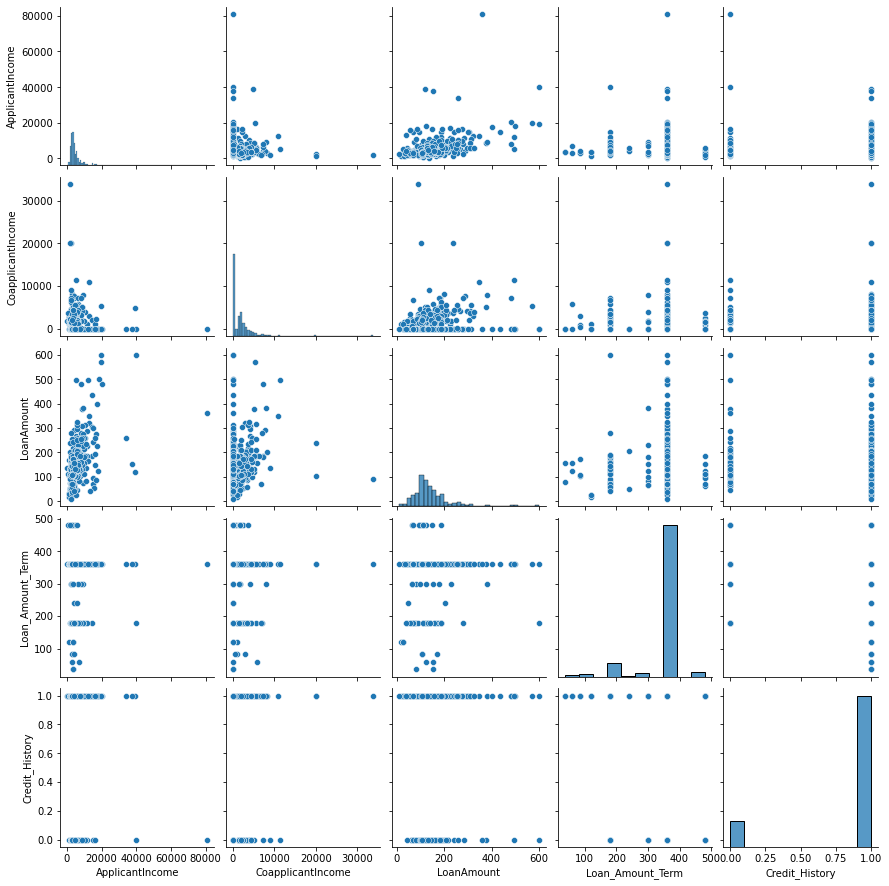

In [15]:
sns.pairplot(df)

In [16]:
#to replace the sting into binary
#to show category as 0 or 1
df = pd.get_dummies(df,drop_first = True)

In [17]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1


In [18]:
df.shape

(480, 12)

In [19]:
corr_matrix = df.corr()
corr_matrix['Loan_Status_Y'].sort_values(ascending = False)

Loan_Status_Y              1.000000
Credit_History             0.529390
Property_Area_Semiurban    0.155686
Married_Yes                0.112321
Gender_Male                0.064504
Loan_Amount_Term          -0.007798
Self_Employed_Yes         -0.034715
ApplicantIncome           -0.043152
CoapplicantIncome         -0.049020
Property_Area_Urban       -0.055964
Education_Not Graduate    -0.068437
LoanAmount                -0.071753
Name: Loan_Status_Y, dtype: float64

In [20]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [21]:
df1 = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Urban' ],axis = 1)

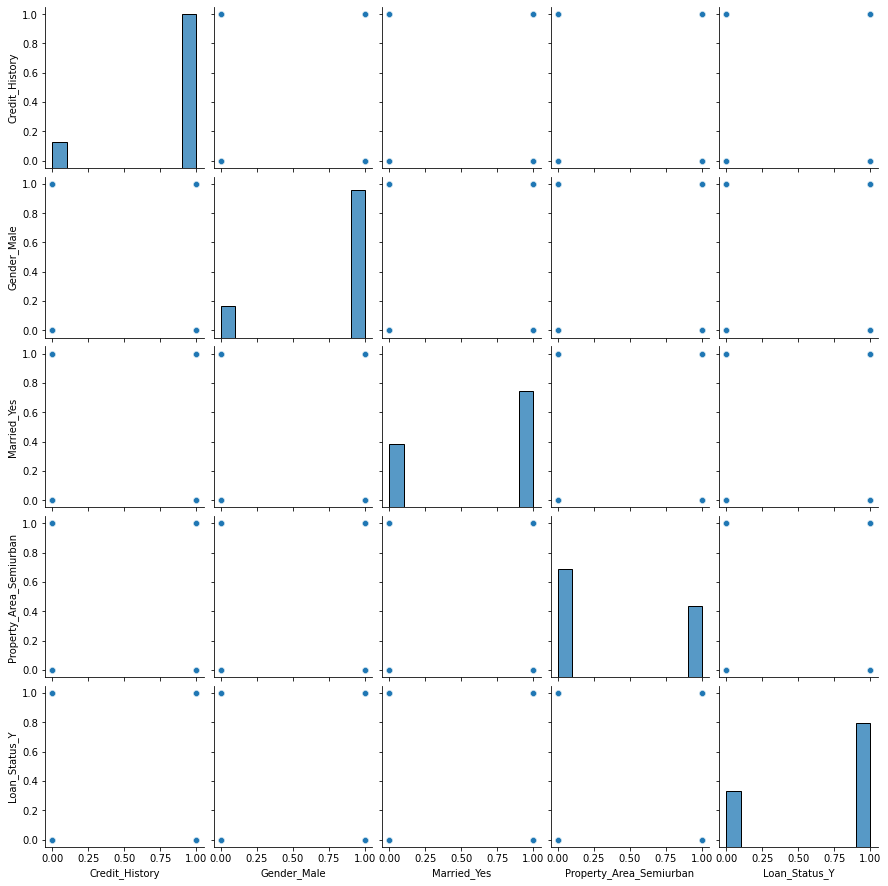

In [22]:
sns .pairplot(df1)

In [23]:
x = df1.iloc[:,:4]

In [24]:
x.head()

,Credit_History,Gender_Male,Married_Yes,Property_Area_Semiurban
1,1.0,1,1,0
2,1.0,1,1,0
3,1.0,1,1,0
4,1.0,1,0,0
5,1.0,1,1,0


In [25]:
y = df1.iloc[:,-1]

In [26]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status_Y, dtype: uint8

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test =train_test_split( x,y,test_size=0.2,random_state=2)

In [29]:
x_train.head()

,Credit_History,Gender_Male,Married_Yes,Property_Area_Semiurban
144,1.0,1,1,0
217,1.0,1,1,1
8,1.0,1,1,0
255,1.0,0,0,0
399,0.0,0,0,1


In [30]:
knn = KNeighborsClassifier(n_neighbors=2,algorithm='auto')

In [31]:
knn

KNeighborsClassifier(n_neighbors=2)

In [32]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [40]:
d1 = knn.score(x_test,y_test)
d1

0.78125

In [41]:
d1

0.78125

In [42]:
from sklearn.metrics import classification_report


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        37
           1       0.74      0.98      0.85        59

    accuracy                           0.78        96
   macro avg       0.84      0.72      0.73        96
weighted avg       0.82      0.78      0.76        96



c:\Users\santhosh s\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Status_Y', ylabel='Density'>

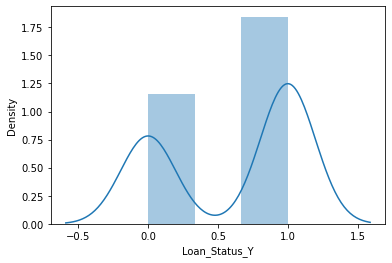

In [45]:
sns.distplot(y_test)#to check the predict result

In [46]:
import pickle
file = open('random_model.pkl','wb')


In [48]:
pickle.dump(knn,file)

In [49]:
df1.columns

Index(['Credit_History', 'Gender_Male', 'Married_Yes',
       'Property_Area_Semiurban', 'Loan_Status_Y'],
      dtype='object')